# EETBS Project                      
### (PART 2/2)

#### In this project we want to predict the room internal temperature of the next 15 min, 30 min and 1 hour and the room occupancy
#### This part is dedicated to occupancy prediction

#### We first import the useful modules

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib notebook

#### After we have chosen the suitable datatset for our scope, we import it
This dataset is collected from a monitor system mounted in a domotic house. It corresponds to approximately 40 days of monitoring data. The data was sampled every minute, computing and uploading it smoothed with 15 minute means.
https://archive.ics.uci.edu/ml/datasets/SML2010

Since this dataset didn't include occupancy data we tried to complete it with another database from another residential building: https://openei.org/datasets/dataset/long-term-occupancy-data-for-residential-and-commercial-building.

Obviously that would lead to an inaccurate analysis because human behaviour for sure will not be perfectly matched.
Anyways we expect occupancy to be correlated to humidity, CO2, light and working hour.

In [309]:
ExternalFiles_folder = r"C:\Users\Angela\Google Drive\Progetto Building"
FileName = "DatasetNOSTRO_conOCCUPANCY.csv"
path_File = os.path.join(ExternalFiles_folder,FileName)

In [310]:
DF_main= pd.read_csv(path_File, sep=";" , index_col=0)

In [311]:
DF_main.head()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,Occupancy
13/03/2012 11:45,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0,0
13/03/2012 12:00,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0,0
13/03/2012 12:15,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0,0
13/03/2012 12:30,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0,0
13/03/2012 12:45,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0,0


#### We decide to construct a data frame made up of only the columns to which we are interested 

In [312]:
DATASET = DF_main[["4:Temperature_Habitacion_Sensor","22:Temperature_Exterior_Sensor","18:Meteo_Exterior_Piranometro","7:CO2_Habitacion_Sensor","9:Humedad_Habitacion_Sensor","11:Lighting_Habitacion_Sensor","Occupancy"]]
DATASET.loc[DATASET.loc[:,"18:Meteo_Exterior_Piranometro"]<0,"18:Meteo_Exterior_Piranometro"]=0

#### We have changed the negative values of the irradiance into zero

In [313]:
DATASET.head(100)

,4:Temperature_Habitacion_Sensor,22:Temperature_Exterior_Sensor,18:Meteo_Exterior_Piranometro,7:CO2_Habitacion_Sensor,9:Humedad_Habitacion_Sensor,11:Lighting_Habitacion_Sensor,Occupancy
13/03/2012 11:45,17.8275,18.1150,758.88000,221.920,42.4150,113.5200,0
13/03/2012 12:00,18.1207,18.4147,762.06900,220.363,42.2453,113.6050,0
13/03/2012 12:15,18.4367,18.8533,766.25100,218.933,42.2267,113.6000,0
13/03/2012 12:30,18.7513,19.2907,766.03700,217.045,42.0987,113.3440,0
13/03/2012 12:45,19.0414,19.7400,762.74300,216.080,42.0686,113.0340,0
13/03/2012 13:00,19.2773,20.1660,752.68300,216.011,42.0347,113.6000,0
13/03/2012 13:15,19.5367,20.5660,740.94900,215.829,41.9947,112.9810,0
13/03/2012 13:30,19.7307,20.8427,721.10900,215.296,41.9947,111.2590,0
13/03/2012 13:45,19.9693,21.2040,699.39200,214.549,42.1253,83.3547,0
13/03/2012 14:00,20.1407,21.5227,677.67500,213.909,42.0427,83.3600,0


#### Time related features

In [314]:
oldIndex_main = DATASET.index  
NewIndex_main = pd.to_datetime(oldIndex_main, dayfirst=True)
DATASET.index = NewIndex_main
DATASET.head()

,4:Temperature_Habitacion_Sensor,22:Temperature_Exterior_Sensor,18:Meteo_Exterior_Piranometro,7:CO2_Habitacion_Sensor,9:Humedad_Habitacion_Sensor,11:Lighting_Habitacion_Sensor,Occupancy
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,0
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,0
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,0
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,0
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,0


#### Renaming columns

In [315]:
DATASET.columns = ["Tin", "Tout", "Sun", "CO2", "Humidity", "Light","Occupancy"]
DATASET.head()

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,0
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,0
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,0
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,0
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,0


#### Adding time-related features: extracting the hour and assign it to a column called hour, same with minute, week, day of week, month. 

In [316]:
DATASET.loc[:,"hour"] = DATASET.index.hour
DATASET.head()

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,0,11
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,0,12
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,0,12
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,0,12
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,0,12


In [317]:
DATASET.loc[:,"min"]=DATASET.index.minute
DATASET.head()

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour,min
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,0,11,45
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,0,12,0
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,0,12,15
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,0,12,30
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,0,12,45


#### But the parameter hour does not represent the continuity of the time : one alternative solution is to use sin(hour) and cos(hour)

In [318]:
DATASET.loc[:,"sin(hour)"] = np.sin(DATASET.index.hour*2*np.pi/24)
DATASET.loc[:,"cos(hour)"] = np.cos(DATASET.index.hour*2*np.pi/24)
DATASET.loc[:,"sin(min)"] = np.sin(DATASET.index.minute*2*np.pi/24)
DATASET.loc[:,"cos(min)"] = np.cos(DATASET.index.minute*2*np.pi/24)
DATASET.head()

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour,min,sin(hour),cos(hour),sin(min),cos(min)
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,0,11,45,2.588190e-01,-0.965926,-0.707107,7.071068e-01
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,0,12,0,1.224647e-16,-1.000000,0.000000,1.000000e+00
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,0,12,15,1.224647e-16,-1.000000,-0.707107,-7.071068e-01
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,0,12,30,1.224647e-16,-1.000000,1.000000,1.194340e-15
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,0,12,45,1.224647e-16,-1.000000,-0.707107,7.071068e-01


In [319]:
DATASET.loc[:,"month"] = DATASET.index.month
DATASET.loc[:,"dayOfWeek"] = DATASET.index.dayofweek
DATASET.loc[:,"weekOfYear"] = DATASET.index.week
DATASET.head(100)

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour,min,sin(hour),cos(hour),sin(min),cos(min),month,dayOfWeek,weekOfYear
2012-03-13 11:45:00,17.8275,18.1150,758.88000,221.920,42.4150,113.5200,0,11,45,2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11
2012-03-13 12:00:00,18.1207,18.4147,762.06900,220.363,42.2453,113.6050,0,12,0,1.224647e-16,-1.000000e+00,0.000000,1.000000e+00,3,1,11
2012-03-13 12:15:00,18.4367,18.8533,766.25100,218.933,42.2267,113.6000,0,12,15,1.224647e-16,-1.000000e+00,-0.707107,-7.071068e-01,3,1,11
2012-03-13 12:30:00,18.7513,19.2907,766.03700,217.045,42.0987,113.3440,0,12,30,1.224647e-16,-1.000000e+00,1.000000,1.194340e-15,3,1,11
2012-03-13 12:45:00,19.0414,19.7400,762.74300,216.080,42.0686,113.0340,0,12,45,1.224647e-16,-1.000000e+00,-0.707107,7.071068e-01,3,1,11
2012-03-13 13:00:00,19.2773,20.1660,752.68300,216.011,42.0347,113.6000,0,13,0,-2.588190e-01,-9.659258e-01,0.000000,1.000000e+00,3,1,11
2012-03-13 13:15:00,19.5367,20.5660,740.94900,215.829,41.9947,112.9810,0,13,15,-2.588190e-01,-9.659258e-01,-0.707107,-7.071068e-01,3,1,11
2012-03-13 13:30:00,19.7307,20.8427,721.10900,215.296,41.9947,111.2590,0,13,30,-2.588190e-01,-9.659258e-01,1.000000,1.194340e-15,3,1,11
2012-03-13 13:45:00,19.9693,21.2040,699.39200,214.549,42.1253,83.3547,0,13,45,-2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11
2012-03-13 14:00:00,20.1407,21.5227,677.67500,213.909,42.0427,83.3600,0,14,0,-5.000000e-01,-8.660254e-01,0.000000,1.000000e+00,3,1,11


#### Finally we define two functions to find whether the day is a weekend day and whether the hour is a working hour. Considering that day 1 (13.03.2012) was Tuesday.

In [320]:
def WeekendDetector(day):
    if day == 5 or day == 6:
        weekendLabel = 1
    else:
        weekendLabel = 0
    return weekendLabel

In [321]:
def WorkingHourDetector(hour):
    if hour >= 9 and hour < 12:
        workingHourLabel = 1
    elif hour >= 15 and hour < 19:
        workingHourLabel = 1
    else:
        workingHourLabel = 0
    return workingHourLabel

In [322]:
DATASET.loc[:,"WeekendLabel"]=DATASET.loc[:,"dayOfWeek"].apply(WeekendDetector)
DATASET.loc[:,"WorkingHourLabel"]=DATASET.loc[:,"hour"].apply(WorkingHourDetector)
DATASET.head(100)

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour,min,sin(hour),cos(hour),sin(min),cos(min),month,dayOfWeek,weekOfYear,WeekendLabel,WorkingHourLabel
2012-03-13 11:45:00,17.8275,18.1150,758.88000,221.920,42.4150,113.5200,0,11,45,2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11,0,1
2012-03-13 12:00:00,18.1207,18.4147,762.06900,220.363,42.2453,113.6050,0,12,0,1.224647e-16,-1.000000e+00,0.000000,1.000000e+00,3,1,11,0,0
2012-03-13 12:15:00,18.4367,18.8533,766.25100,218.933,42.2267,113.6000,0,12,15,1.224647e-16,-1.000000e+00,-0.707107,-7.071068e-01,3,1,11,0,0
2012-03-13 12:30:00,18.7513,19.2907,766.03700,217.045,42.0987,113.3440,0,12,30,1.224647e-16,-1.000000e+00,1.000000,1.194340e-15,3,1,11,0,0
2012-03-13 12:45:00,19.0414,19.7400,762.74300,216.080,42.0686,113.0340,0,12,45,1.224647e-16,-1.000000e+00,-0.707107,7.071068e-01,3,1,11,0,0
2012-03-13 13:00:00,19.2773,20.1660,752.68300,216.011,42.0347,113.6000,0,13,0,-2.588190e-01,-9.659258e-01,0.000000,1.000000e+00,3,1,11,0,0
2012-03-13 13:15:00,19.5367,20.5660,740.94900,215.829,41.9947,112.9810,0,13,15,-2.588190e-01,-9.659258e-01,-0.707107,-7.071068e-01,3,1,11,0,0
2012-03-13 13:30:00,19.7307,20.8427,721.10900,215.296,41.9947,111.2590,0,13,30,-2.588190e-01,-9.659258e-01,1.000000,1.194340e-15,3,1,11,0,0
2012-03-13 13:45:00,19.9693,21.2040,699.39200,214.549,42.1253,83.3547,0,13,45,-2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11,0,0
2012-03-13 14:00:00,20.1407,21.5227,677.67500,213.909,42.0427,83.3600,0,14,0,-5.000000e-01,-8.660254e-01,0.000000,1.000000e+00,3,1,11,0,0


#### Create function that create lagged parameters for us

In [323]:
def lag_gen_feature(inputDF, columnName, lag_start, lag_end, lag_interval):
 for i in range(lag_start,lag_end+1,lag_interval):
    new_column_name = columnName+ " -"+str(i)+"h/4"
    if new_column_name in inputDF.columns:
        pass
    else:
        print new_column_name
        inputDF.loc[:,new_column_name]=inputDF.loc[:,columnName].shift(i)
        inputDF.dropna(inplace=True)
 return inputDF

In [324]:
DATASET = lag_gen_feature(DATASET,"Tout",1,16,1)
DATASET = lag_gen_feature(DATASET,"Sun",15,30,1)
DATASET = lag_gen_feature(DATASET,"CO2",10,25,1) #facciamo partire da 10 perchè notato che aumentava
DATASET = lag_gen_feature(DATASET,"Humidity",1,16,1)
DATASET = lag_gen_feature(DATASET,"Tin",1,16,1)
DATASET = lag_gen_feature(DATASET,"Occupancy",1,16,1)
DATASET.head(10)

Tout -1h/4


C:\Users\Angela\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Tout -2h/4
Tout -3h/4
Tout -4h/4
Tout -5h/4
Tout -6h/4
Tout -7h/4
Tout -8h/4
Tout -9h/4
Tout -10h/4
Tout -11h/4
Tout -12h/4
Tout -13h/4
Tout -14h/4
Tout -15h/4
Tout -16h/4
Sun -15h/4
Sun -16h/4
Sun -17h/4
Sun -18h/4
Sun -19h/4
Sun -20h/4
Sun -21h/4
Sun -22h/4
Sun -23h/4
Sun -24h/4
Sun -25h/4
Sun -26h/4
Sun -27h/4
Sun -28h/4
Sun -29h/4
Sun -30h/4
CO2 -10h/4
CO2 -11h/4
CO2 -12h/4
CO2 -13h/4
CO2 -14h/4
CO2 -15h/4
CO2 -16h/4
CO2 -17h/4
CO2 -18h/4
CO2 -19h/4
CO2 -20h/4
CO2 -21h/4
CO2 -22h/4
CO2 -23h/4
CO2 -24h/4
CO2 -25h/4
Humidity -1h/4
Humidity -2h/4
Humidity -3h/4
Humidity -4h/4
Humidity -5h/4
Humidity -6h/4
Humidity -7h/4
Humidity -8h/4
Humidity -9h/4
Humidity -10h/4
Humidity -11h/4
Humidity -12h/4
Humidity -13h/4
Humidity -14h/4
Humidity -15h/4
Humidity -16h/4
Tin -1h/4
Tin -2h/4
Tin -3h/4
Tin -4h/4
Tin -5h/4
Tin -6h/4
Tin -7h/4
Tin -8h/4
Tin -9h/4
Tin -10h/4
Tin -11h/4
Tin -12h/4
Tin -13h/4
Tin -14h/4
Tin -15h/4
Tin -16h/4
Occupancy -1h/4
Occupancy -2h/4
Occupancy -3h/4
Occupancy -4h/

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour,min,sin(hour),...,Occupancy -7h/4,Occupancy -8h/4,Occupancy -9h/4,Occupancy -10h/4,Occupancy -11h/4,Occupancy -12h/4,Occupancy -13h/4,Occupancy -14h/4,Occupancy -15h/4,Occupancy -16h/4
2012-03-25 19:45:00,20.1387,17.4927,0.0,210.848,50.7520,13.1027,0,19,45,-0.965926,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2012-03-25 20:00:00,20.0640,17.2827,0.0,211.189,51.0133,12.6793,0,20,0,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2012-03-25 20:15:00,19.9700,17.1027,0.0,211.925,51.2320,13.4433,0,20,15,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2012-03-25 20:30:00,19.8553,16.8927,0.0,211.691,51.3893,13.1840,0,20,30,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2012-03-25 20:45:00,19.7833,16.6993,0.0,212.149,51.5253,12.1913,0,20,45,-0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-03-25 21:00:00,19.6940,16.5067,0.0,213.344,51.6427,13.6067,0,21,0,-0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-25 21:15:00,19.5600,16.2940,0.0,215.147,51.6667,13.1027,1,21,15,-0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-25 21:30:00,19.4867,16.1053,0.0,217.035,51.6507,12.4513,1,21,30,-0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-25 21:45:00,19.3567,15.9767,0.0,220.160,51.6187,13.4600,1,21,45,-0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-25 22:00:00,19.2633,15.8047,0.0,220.171,51.6160,12.6793,1,22,0,-0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation matrix

In [325]:
CorrelationMatrix=DATASET.corr()
CorrelationMatrix

,Tin,Tout,Sun,CO2,Humidity,Light,Occupancy,hour,min,sin(hour),...,Occupancy -7h/4,Occupancy -8h/4,Occupancy -9h/4,Occupancy -10h/4,Occupancy -11h/4,Occupancy -12h/4,Occupancy -13h/4,Occupancy -14h/4,Occupancy -15h/4,Occupancy -16h/4
Tin,1.000000,0.859676,0.094464,0.043399,-0.377358,-0.037702,-0.150875,0.513547,-1.841006e-06,-0.727189,...,-0.268726,-0.279624,-0.289024,-0.297252,-0.304421,-0.309536,-0.313194,-0.315644,-0.316678,-0.315879
Tout,0.859676,1.000000,0.495326,0.071104,-0.308082,0.335645,-0.322905,0.472833,-3.517576e-04,-0.631617,...,-0.380896,-0.379641,-0.375820,-0.371126,-0.365702,-0.357997,-0.347507,-0.335076,-0.321936,-0.308545
Sun,0.094464,0.495326,1.000000,0.163774,-0.145606,0.932886,-0.403894,0.033101,5.922982e-03,0.044378,...,-0.263300,-0.227526,-0.203136,-0.182037,-0.156866,-0.120427,-0.094876,-0.067036,-0.040446,-0.006700
CO2,0.043399,0.071104,0.163774,1.000000,-0.068392,0.180536,-0.078636,0.000138,-2.772472e-05,0.017353,...,0.000104,0.008952,0.011402,0.011667,0.011661,0.014774,0.019102,0.022256,0.022088,0.019269
Humidity,-0.377358,-0.308082,-0.145606,-0.068392,1.000000,-0.116129,0.115889,-0.047205,-8.057213e-04,0.067498,...,0.118599,0.118366,0.117297,0.117069,0.117670,0.117359,0.116930,0.116017,0.114414,0.112780
Light,-0.037702,0.335645,0.932886,0.180536,-0.116129,1.000000,-0.347246,-0.025695,7.528471e-03,0.166977,...,-0.156358,-0.117237,-0.096069,-0.078505,-0.054536,-0.018587,0.003404,0.024761,0.041618,0.062193
Occupancy,-0.150875,-0.322905,-0.403894,-0.078636,0.115889,-0.347246,1.000000,-0.065257,1.000108e-02,0.087814,...,0.386198,0.355068,0.323961,0.287426,0.264539,0.245469,0.199156,0.170862,0.148033,0.115365
hour,0.513547,0.472833,0.033101,0.000138,-0.047205,-0.025695,-0.065257,1.000000,1.577398e-03,-0.774862,...,-0.170946,-0.191235,-0.206450,-0.225027,-0.249772,-0.264381,-0.278241,-0.296781,-0.317179,-0.334399
min,-0.000002,-0.000352,0.005923,-0.000028,-0.000806,0.007528,0.010001,0.001577,1.000000e+00,-0.002364,...,-0.005283,0.010562,0.011145,-0.017591,-0.005276,0.012310,0.011137,-0.019923,-0.005272,0.014644
sin(hour),-0.727189,-0.631617,0.044378,0.017353,0.067498,0.166977,0.087814,-0.774862,-2.363537e-03,1.000000,...,0.270458,0.290554,0.310812,0.328659,0.349011,0.361928,0.375373,0.386641,0.400313,0.410413


#### Saving correlation matrix

In [326]:
#Project_folder = r"C:\Users\Angela\Google Drive\Progetto Building"
#path_modified_csv = os.path.join(Project_folder,"CorrelationMatrixconOccupancy.csv")
#CorrelationMatrix.to_csv(path_modified_csv, sep=";")

# OCCUPANCY PREDICTION in the next 15 min

#### We want to see which column is more correlated to the one to which we are interested

In [395]:
RowOccupancy=CorrelationMatrix.loc["Occupancy",:]
Ordered_Occ_corr=pd.Series(RowOccupancy).order(ascending=False)
Ordered_Occ_corr.head(50)

C:\Users\Angela\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Occupancy           1.000000
Occupancy -1h/4     0.695256
Occupancy -2h/4     0.587452
Occupancy -3h/4     0.523426
Occupancy -4h/4     0.492210
Occupancy -5h/4     0.453988
cos(hour)           0.420575
Occupancy -6h/4     0.409164
Occupancy -7h/4     0.386198
Occupancy -8h/4     0.355068
Occupancy -9h/4     0.323961
Occupancy -10h/4    0.287426
Occupancy -11h/4    0.264539
Tin -16h/4          0.254747
Occupancy -12h/4    0.245469
Tin -15h/4          0.232815
Tin -14h/4          0.208945
Occupancy -13h/4    0.199156
Tin -13h/4          0.183804
Occupancy -14h/4    0.170862
Tin -12h/4          0.157666
Occupancy -15h/4    0.148033
Sun -30h/4          0.144100
Tin -11h/4          0.131091
Sun -29h/4          0.116394
Humidity            0.115889
Occupancy -16h/4    0.115365
Humidity -1h/4      0.114393
Humidity -3h/4      0.113970
Humidity -4h/4      0.113878
Humidity -2h/4      0.113817
Humidity -5h/4      0.112034
Humidity -6h/4      0.109077
Humidity -7h/4      0.107204
Humidity -8h/4

We expected occupancy to be correlated to humidity, CO2, light and working hour but results are not very good already.
In fact we took the occupancy column from another dataset of a domestic house, this means that human behaviour for sure will not be perfectly matched.

#### Creating target and features dataframes

In [328]:
DF_target_occ = DATASET.loc[:,["Occupancy"]]
DF_featurs_occ = DATASET.drop("Occupancy",axis=1)

## A) Train-Test splitting occupancy

#### We decide that the test size will be the 20% of the train size but the row are chosen randomly

In [329]:
from sklearn.model_selection import train_test_split 
X_train_occ, X_test_occ, Y_train_occ, Y_test_occ = train_test_split(DF_featurs_occ, DF_target_occ, test_size=0.2, random_state=41234)

#### Let's import the linear model

In [330]:
from sklearn import linear_model
linear_reg_occ = linear_model.LinearRegression()
print(linear_reg_occ)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


#### Let's first train my model with the train data

In [331]:
linear_reg_occ.fit(X_train_occ,Y_train_occ)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicting the values for the test set

In [332]:
predicted_linearReg_split_occ = linear_reg_occ.predict(X_test_occ)

In [333]:
Predicted_DF_linearReg_split_occ = pd.DataFrame(predicted_linearReg_split_occ, index= Y_test_occ.index, columns=["Occupancy predicted test train"])
Predicted_DF_linearReg_split_occ = Predicted_DF_linearReg_split_occ.join(Y_test_occ)
Predicted_DF_linearReg_split_occ.head()

,Occupancy predicted test train,Occupancy
2012-03-27 09:30:00,0.414282,0
2012-04-01 11:00:00,-0.024476,0
2012-04-06 22:30:00,1.021032,1
2012-04-01 02:45:00,0.652845,1
2012-04-06 02:15:00,0.977687,1


#### Plotting a sample

<IPython.core.display.Javascript object>


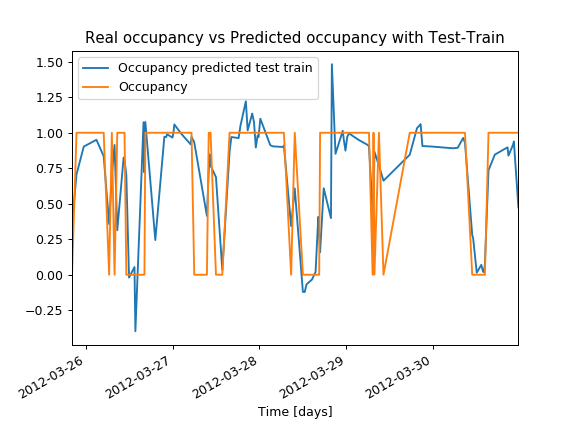

In [399]:
Predicted_DF_linearReg_split_sample_occ = Predicted_DF_linearReg_split_occ.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_split_sample_occ.plot()
plt.xlabel("Time [days]")
plt.title("Real occupancy vs Predicted occupancy with Test-Train")

#### Measuring the accuracy

In [335]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split_occ= mean_absolute_error(Y_test_occ, predicted_linearReg_split_occ)
MSE_linearReg_split_occ= mean_squared_error(Y_test_occ,predicted_linearReg_split_occ)
R2_linearReg_split_occ = r2_score(Y_test_occ, predicted_linearReg_split_occ)
print("MAE test_train:"+str(MAE_linearReg_split_occ))
print("MSE test_train:"+ str(MSE_linearReg_split_occ))
print("R2 test_train:"+str(R2_linearReg_split_occ))

MAE test_train:0.218821991325
MSE test_train:0.0991047921418
R2 test_train:0.570253251515


#### R2 value is not high Q.E.D.

## B) Cross Validation occupancy

#### Although we know that this a time-series let's carry out a cross valdiation
#### We divide our data frame into 10 blocks: this time we train on 9 blocks and test on 1 block, changing them each time. In this way we will test all the rows of the dataframe 

In [336]:
from sklearn.model_selection import cross_val_predict
predicted_linearReg_CV_occ = cross_val_predict(linear_reg_occ, DF_featurs_occ, DF_target_occ, cv=10)

In [337]:
Predicted_DF_linearReg_CV_occ = pd.DataFrame(predicted_linearReg_CV_occ, index= DF_target_occ.index, columns=["Occupancy predicted Cross Validation"])
Predicted_DF_linearReg_CV_occ = Predicted_DF_linearReg_CV_occ.join(DF_target_occ)
Predicted_DF_linearReg_CV_occ.head(24)

,Occupancy predicted Cross Validation,Occupancy
2012-03-25 19:45:00,0.308796,0
2012-03-25 20:00:00,0.260316,0
2012-03-25 20:15:00,0.371996,0
2012-03-25 20:30:00,0.284509,0
2012-03-25 20:45:00,0.193088,0
2012-03-25 21:00:00,0.326485,0
2012-03-25 21:15:00,0.228874,1
2012-03-25 21:30:00,0.732079,1
2012-03-25 21:45:00,0.823049,1
2012-03-25 22:00:00,0.845301,1


<IPython.core.display.Javascript object>


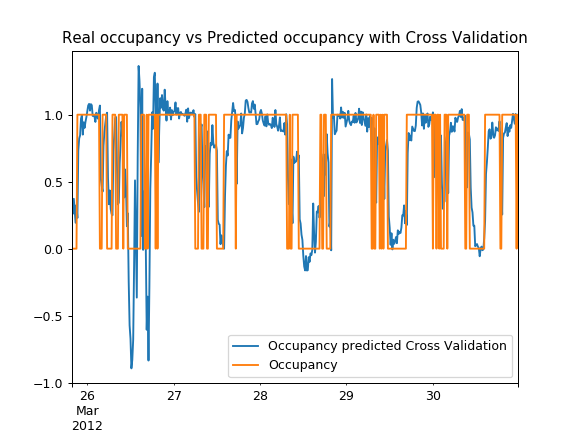

In [398]:
Predicted_DF_linearReg_CV_sample_occ = Predicted_DF_linearReg_CV_occ.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_CV_sample_occ.plot()
plt.xlabel("Time [days]")
plt.title("Real occupancy vs Predicted occupancy with Cross Validation")

In [339]:
MAE_linearReg_CV_occ = mean_absolute_error(DF_target_occ, predicted_linearReg_CV_occ)
MSE_linearReg_CV_occ = mean_squared_error(DF_target_occ,predicted_linearReg_CV_occ)
R2_linearReg_CV_occ = r2_score(DF_target_occ,predicted_linearReg_CV_occ)
print("MAE cross_validation:"+str(MAE_linearReg_CV_occ))
print("MSE cross_validation:"+ str(MSE_linearReg_CV_occ))
print("R2 cross_validation:"+str(R2_linearReg_CV_occ))

MAE cross_validation:0.243062282558
MSE cross_validation:0.128890793672
R2 cross_validation:0.443196232191


Cross Validation results are worse in fact, being the dataset a time series, it can happen for example that during weekends (or holidays) results are messed up (one block will contain holiday days). In these cases it is better to use methods taking random data (ex: Train-Test) or walk foward.

## C) Random Forest occupancy

#### It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [340]:
from sklearn.ensemble import RandomForestRegressor
RF_reg_occ = RandomForestRegressor()

In [341]:
predicted_RF_reg_CV_occ= cross_val_predict(RF_reg_occ, DF_featurs_occ, DF_target_occ, cv=10)

In [342]:
Predicted_DF_RF_Reg_CV_occ = pd.DataFrame(predicted_RF_reg_CV_occ, index= DF_target_occ.index, columns=["Occupancy predicted Random Forest"])
Predicted_DF_RF_Reg_CV_occ = Predicted_DF_RF_Reg_CV_occ.join(DF_target_occ)
Predicted_DF_RF_Reg_CV_occ.head(24)

,Occupancy predicted Random Forest,Occupancy
2012-03-25 19:45:00,0.4,0
2012-03-25 20:00:00,0.3,0
2012-03-25 20:15:00,0.2,0
2012-03-25 20:30:00,0.2,0
2012-03-25 20:45:00,0.3,0
2012-03-25 21:00:00,0.1,0
2012-03-25 21:15:00,0.2,1
2012-03-25 21:30:00,0.7,1
2012-03-25 21:45:00,0.7,1
2012-03-25 22:00:00,0.7,1


<IPython.core.display.Javascript object>


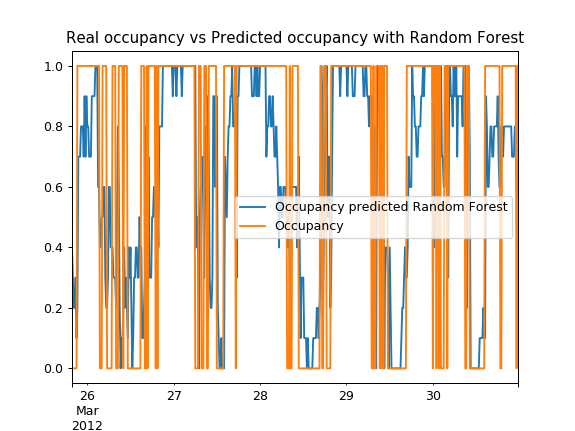

In [400]:
Predicted_DF_RF_Reg_CV_sample_occ = Predicted_DF_RF_Reg_CV_occ.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_RF_Reg_CV_sample_occ.plot()
plt.xlabel("Time [days]")
plt.title("Real occupancy vs Predicted occupancy with Random Forest")

In [344]:
MAE_RF_Reg_CV_occ = mean_absolute_error(DF_target_occ, predicted_RF_reg_CV_occ)
MSE_RF_Reg_CV_occ = mean_squared_error(DF_target_occ,predicted_RF_reg_CV_occ)
R2_RF_Reg_CV_occ = r2_score(DF_target_occ, predicted_RF_reg_CV_occ)
print("MAE random_forest:"+ str(MAE_RF_Reg_CV_occ))
print("MSE random_forest:"+ str(MSE_RF_Reg_CV_occ))
print("R2 random_forest:"+ str(R2_RF_Reg_CV_occ))

MAE random_forest:0.324556962025
MSE random_forest:0.183911392405
R2 random_forest:0.205509149903


It is better to predict low values (zeros)  because it doesn't use linear regression but it uses trees and branches. In our particular case this approach is not good.

## D) Walk Forward occupancy

#### Instead of using a single large testing period, we split the whole data into smaller chunks to perform consecutive analyses. For example, instead of optimizing ten years of data and using the eleventh year for testing, the optimization is done first across the first three years, and the system is tested in the fourth. Once this test is completed, the four years window is moved forward one year, and the procedure is repeated until the last year is reached. 
#### We'll do the same training on 10 days and moving forward 1 day until the last day (11.04.2012) of our dataset is reached.

In [345]:
DF_online_prediction_occ = pd.DataFrame(index=DATASET.index)
DF_online_prediction_occ.head()

""
2012-03-25 19:45:00
2012-03-25 20:00:00
2012-03-25 20:15:00
2012-03-25 20:30:00
2012-03-25 20:45:00


In [460]:
FirstTimeStampMeasured_occ = DATASET.index[0]
PeriodOfTraining_occ = pd.Timedelta(12, unit="d")
FirstTimeStampToPredict_occ = FirstTimeStampMeasured_occ + PeriodOfTraining_occ
LastTimeStampMeasured_occ = DATASET.index[-1]
training_start_time_stamp_occ = FirstTimeStampMeasured_occ
training_end_time_stamp_occ = FirstTimeStampToPredict_occ - pd.Timedelta(15, unit="m")

In [462]:
FirstTimeStampMeasured_occ

Timestamp('2012-03-25 19:45:00')

In [463]:
PeriodOfTraining_occ

Timedelta('12 days 00:00:00')

In [464]:
FirstTimeStampToPredict_occ

Timestamp('2012-04-06 19:45:00')

In [465]:
LastTimeStampMeasured_occ

Timestamp('2012-04-11 06:30:00')

In [466]:
DF_online_prediction_occ = DF_online_prediction_occ.truncate(before = FirstTimeStampToPredict_occ)
DF_online_prediction_occ.head()

,Predicted,Real
2012-04-06 19:45:00,1.0,1.0
2012-04-06 20:00:00,1.0,1.0
2012-04-06 20:15:00,0.9,1.0
2012-04-06 20:30:00,1.0,1.0
2012-04-06 20:45:00,1.0,1.0


In [467]:
time_stamp_to_predict_occ = FirstTimeStampToPredict_occ
while (time_stamp_to_predict_occ <= LastTimeStampMeasured_occ):
    DF_features_train_occ = DF_featurs_occ.truncate(before=training_start_time_stamp_occ,after=training_end_time_stamp_occ)
    DF_target_train_occ = DF_target_occ.truncate(before=training_start_time_stamp_occ,after=training_end_time_stamp_occ)
    DF_features_test_occ = DF_featurs_occ.loc[time_stamp_to_predict_occ,:].values.reshape(1,-1)
    DF_target_test_occ = DF_target_occ.loc[time_stamp_to_predict_occ,"Occupancy"]
  #let's train
    RF_reg_occ.fit(DF_features_train_occ, DF_target_train_occ)
    predicted_occ = RF_reg_occ.predict(DF_features_test_occ)
    DF_online_prediction_occ.loc[time_stamp_to_predict_occ,"Predicted"] = predicted_occ
    DF_online_prediction_occ.loc[time_stamp_to_predict_occ,"Real"] = DF_target_test_occ
    time_stamp_to_predict_occ = time_stamp_to_predict_occ + pd.Timedelta(15, unit="m")
    training_start_time_stamp_occ = training_start_time_stamp_occ + pd.Timedelta(15, unit="m")
    training_end_time_stamp_occ = training_end_time_stamp_occ + pd.Timedelta(15, unit="m")

C:\Users\Angela\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [468]:
DF_online_prediction_occ.head()

,Predicted,Real
2012-04-06 19:45:00,1.0,1.0
2012-04-06 20:00:00,1.0,1.0
2012-04-06 20:15:00,1.0,1.0
2012-04-06 20:30:00,1.0,1.0
2012-04-06 20:45:00,1.0,1.0


In [469]:
MAE_WF_occ= mean_absolute_error(DF_online_prediction_occ[["Real"]],DF_online_prediction_occ[["Predicted"]])
MSE_WF_occ= mean_squared_error(DF_online_prediction_occ[["Real"]],DF_online_prediction_occ[["Predicted"]])
R2_WF_occ = r2_score(DF_online_prediction_occ[["Real"]],DF_online_prediction_occ[["Predicted"]])
print("MAE walk_forward:"+ str(MAE_WF_occ))
print("MSE walk_forward:"+ str(MSE_WF_occ))
print("R2 walk_forward:"+ str(R2_WF_occ))

MAE walk_forward:0.216355140187
MSE walk_forward:0.121728971963
R2 walk_forward:0.503975086197


#### Create a table containing the different methods and their relative errors

In [470]:
column_name = ["MAE","MSE","R2"]
index_name = ["Test Train","Cross Validation","Random Forest", "Walk Forward"]
test_train_errors_occ = [MAE_linearReg_split_occ,MSE_linearReg_split_occ,R2_linearReg_split_occ]
cross_validation_errors_occ = [MAE_linearReg_CV_occ,MSE_linearReg_CV_occ,R2_linearReg_CV_occ]
random_forest_errors_occ = [MAE_RF_Reg_CV_occ,MSE_RF_Reg_CV_occ,R2_RF_Reg_CV_occ]
walk_forward_errors_occ = [MAE_WF_occ,MSE_WF_occ,R2_WF_occ]
errors_list_occ = [test_train_errors_occ,cross_validation_errors_occ,random_forest_errors_occ,walk_forward_errors_occ]
errors_data_frame_occ = pd.DataFrame(errors_list_occ, index=index_name, columns=column_name)

errors_data_frame_occ

,MAE,MSE,R2
Test Train,0.218822,0.099105,0.570253
Cross Validation,0.243062,0.128891,0.443196
Random Forest,0.324557,0.183911,0.205509
Walk Forward,0.216355,0.121729,0.503975


# OCCUPANCY PREDICTION in the next hour

In [420]:
dataset_1 = DATASET.drop(["Occupancy -1h/4","Occupancy -2h/4","Occupancy -3h/4","Occupancy -4h/4"],axis=1)

In [421]:
DF_target_1 = dataset_1.loc[:,["Occupancy"]]
DF_featurs_1 = dataset_1.drop("Occupancy",axis=1)

#### Creating target and features dataframes

In [422]:
DF_target_1 = dataset_1.loc[:,["Occupancy"]]
DF_featurs_1 = dataset_1.drop("Occupancy",axis=1)

## A) Train-Test splitting occupancy 1h

#### We decide that the test size will be the 20% of the train size but the row are chosen randomly

In [423]:
from sklearn.model_selection import train_test_split 
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(DF_featurs_1, DF_target_1, test_size=0.2, random_state=41234)

#### Let's import the linear model

In [424]:
from sklearn import linear_model
linear_reg_1 = linear_model.LinearRegression()
print(linear_reg_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


#### Let's first train my model with the train data

In [425]:
linear_reg_1.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicting the values for the test set

In [426]:
predicted_linearReg_split_1 = linear_reg_1.predict(X_test_1)

In [427]:
Predicted_DF_linearReg_split_1 = pd.DataFrame(predicted_linearReg_split_1, index= Y_test_1.index, columns=["Occupancy predicted Test-Train"])
Predicted_DF_linearReg_split_1 = Predicted_DF_linearReg_split_1.join(Y_test_1)
Predicted_DF_linearReg_split_1.head()

,Occupancy predicted Test-Train,Occupancy
2012-03-27 09:30:00,0.537551,0
2012-04-01 11:00:00,0.105572,0
2012-04-06 22:30:00,0.977225,1
2012-04-01 02:45:00,0.298935,1
2012-04-06 02:15:00,0.966447,1


#### Plotting a sample

<IPython.core.display.Javascript object>


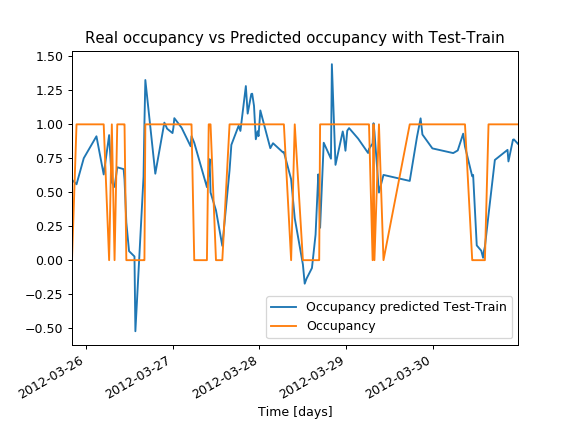

In [428]:
Predicted_DF_linearReg_split_sample_1 = Predicted_DF_linearReg_split_1.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_split_sample_1.plot()
plt.xlabel("Time [days]")
plt.title("Real occupancy vs Predicted occupancy with Test-Train")

In [429]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split_1= mean_absolute_error(Y_test_1,predicted_linearReg_split_1)
MSE_linearReg_split_1= mean_squared_error(Y_test_1, predicted_linearReg_split_1)
R2_linearReg_split_1 = r2_score(Y_test_1, predicted_linearReg_split_1)
print("MAE test_train:"+str(MAE_linearReg_split_1))
print("MSE test_train:"+ str(MSE_linearReg_split_1))
print("R2 test_train:"+str(R2_linearReg_split_1))

MAE test_train:0.307234749147
MSE test_train:0.150223056406
R2 test_train:0.348589824541


#### R2 value is not high Q.E.D.

## B) Cross Validation occupancy 1h

#### We divide our data frame into 10 blocks: this time we train on 9 blocks and test on 1 block, changing them each time. In this way we will test all the rows of the dataframe 

In [430]:
from sklearn.model_selection import cross_val_predict
predicted_linearReg_CV_1 = cross_val_predict(linear_reg_1, DF_featurs_1, DF_target_1, cv=10)

In [431]:
Predicted_DF_linearReg_CV_1 = pd.DataFrame(predicted_linearReg_CV_1, index= DF_target_1.index, columns=["Occupancy predicted Cross Validation"])
Predicted_DF_linearReg_CV_1 = Predicted_DF_linearReg_CV_1.join(DF_target_1)
Predicted_DF_linearReg_CV_1.head(24)

,Occupancy predicted Cross Validation,Occupancy
2012-03-25 19:45:00,0.640911,0
2012-03-25 20:00:00,0.616715,0
2012-03-25 20:15:00,0.696697,0
2012-03-25 20:30:00,0.666820,0
2012-03-25 20:45:00,0.583539,0
2012-03-25 21:00:00,0.694077,0
2012-03-25 21:15:00,0.625746,1
2012-03-25 21:30:00,0.653337,1
2012-03-25 21:45:00,0.625752,1
2012-03-25 22:00:00,0.598534,1


<IPython.core.display.Javascript object>


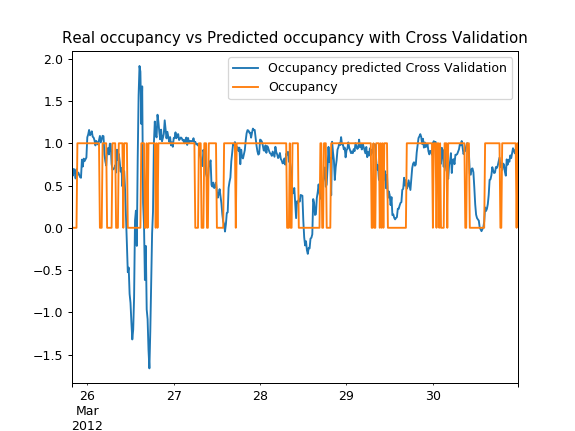

In [432]:
Predicted_DF_linearReg_CV_sample_1 = Predicted_DF_linearReg_CV_1.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_CV_sample_1.plot()
plt.xlabel("Time [days]")
plt.title("Real occupancy vs Predicted occupancy with Cross Validation")

In [433]:
MAE_linearReg_CV_1 = mean_absolute_error(DF_target_1, predicted_linearReg_CV_1)
MSE_linearReg_CV_1 = mean_squared_error(DF_target_1,predicted_linearReg_CV_1)
R2_linearReg_CV_1 = r2_score(DF_target_1,predicted_linearReg_CV_1)
print("MAE cross_validation:"+str(MAE_linearReg_CV_1))
print("MSE cross_validation:"+ str(MSE_linearReg_CV_1))
print("R2 cross_validation:"+str(R2_linearReg_CV_1))

MAE cross_validation:0.344163279152
MSE cross_validation:0.208077753163
R2 cross_validation:0.101111307815


## C) Random Forest occupancy 1h

In [434]:
from sklearn.ensemble import RandomForestRegressor
RF_reg_1 = RandomForestRegressor()

In [435]:
predicted_RF_reg_CV_1= cross_val_predict(RF_reg_1, DF_featurs_1, DF_target_1, cv=10)

In [436]:
Predicted_DF_RF_Reg_CV_1 = pd.DataFrame(predicted_RF_reg_CV_1, index= DF_target_1.index, columns=["Occupancy predicted Random Forest"])
Predicted_DF_RF_Reg_CV_1 = Predicted_DF_RF_Reg_CV_1.join(DF_target_1)
Predicted_DF_RF_Reg_CV_1.head(24)

,Occupancy predicted Random Forest,Occupancy
2012-03-25 19:45:00,0.8,0
2012-03-25 20:00:00,0.8,0
2012-03-25 20:15:00,0.9,0
2012-03-25 20:30:00,0.8,0
2012-03-25 20:45:00,1.0,0
2012-03-25 21:00:00,0.8,0
2012-03-25 21:15:00,0.6,1
2012-03-25 21:30:00,0.5,1
2012-03-25 21:45:00,0.5,1
2012-03-25 22:00:00,0.5,1


<IPython.core.display.Javascript object>


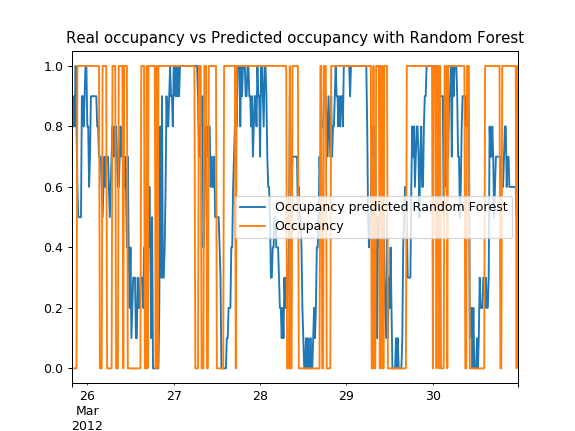

In [437]:
Predicted_DF_RF_Reg_CV_sample_1 = Predicted_DF_RF_Reg_CV_1.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_RF_Reg_CV_sample_1.plot()
plt.xlabel("Time [days]")
plt.title("Real occupancy vs Predicted occupancy with Random Forest")

In [438]:
MAE_RF_Reg_CV_1 = mean_absolute_error(DF_target_1, predicted_RF_reg_CV_1)
MSE_RF_Reg_CV_1 = mean_squared_error(DF_target_1,predicted_RF_reg_CV_1)
R2_RF_Reg_CV_1 = r2_score(DF_target_1, predicted_RF_reg_CV_1)
print("MAE random_forest:"+ str(MAE_RF_Reg_CV_1))
print("MSE random_forest:"+ str(MSE_RF_Reg_CV_1))
print("R2 random_forest:"+ str(R2_RF_Reg_CV_1))

MAE random_forest:0.359240506329
MSE random_forest:0.210746835443
R2 random_forest:0.0895809647415


## D) Walk Forward occupancy 1h

In [439]:
DF_online_prediction_1 = pd.DataFrame(index=dataset_1.index)
DF_online_prediction_1.head()

""
2012-03-25 19:45:00
2012-03-25 20:00:00
2012-03-25 20:15:00
2012-03-25 20:30:00
2012-03-25 20:45:00


In [481]:
FirstTimeStampMeasured_1 = dataset_1.index[0]
PeriodOfTraining_1 = pd.Timedelta(10, unit="d")
FirstTimeStampToPredict_1 = FirstTimeStampMeasured_1 + PeriodOfTraining_1
LastTimeStampMeasured_1 = dataset_1.index[-1]
training_start_time_stamp_1 = FirstTimeStampMeasured_1
training_end_time_stamp_1 = FirstTimeStampToPredict_1 - pd.Timedelta(15, unit="m")

In [482]:
FirstTimeStampMeasured_1

Timestamp('2012-03-25 19:45:00')

In [483]:
PeriodOfTraining_1

Timedelta('10 days 00:00:00')

In [484]:
FirstTimeStampToPredict_1

Timestamp('2012-04-04 19:45:00')

In [485]:
LastTimeStampMeasured_1

Timestamp('2012-04-11 06:30:00')

In [486]:
DF_online_prediction_1 = DF_online_prediction_1.truncate(before = FirstTimeStampToPredict_1)
DF_online_prediction_1.head()

,Predicted,Real
2012-04-06 19:45:00,1.0,1.0
2012-04-06 20:00:00,1.0,1.0
2012-04-06 20:15:00,1.0,1.0
2012-04-06 20:30:00,1.0,1.0
2012-04-06 20:45:00,1.0,1.0


In [487]:
time_stamp_to_predict_1 = FirstTimeStampToPredict_1
while (time_stamp_to_predict_1 <= LastTimeStampMeasured_1):
    DF_features_train_1 = DF_featurs_1.truncate(before=training_start_time_stamp_1,after=training_end_time_stamp_1)
    DF_target_train_1 = DF_target_1.truncate(before=training_start_time_stamp_1,after=training_end_time_stamp_1)
    DF_features_test_1 = DF_featurs_1.loc[time_stamp_to_predict_1,:].values.reshape(1,-1)
    DF_target_test_1 = DF_target_1.loc[time_stamp_to_predict_1,"Occupancy"]
  #let's train
    RF_reg_1.fit(DF_features_train_1, DF_target_train_1)
    predicted_1 = RF_reg_1.predict(DF_features_test_1)
    DF_online_prediction_1.loc[time_stamp_to_predict_1,"Predicted"] = predicted_1
    DF_online_prediction_1.loc[time_stamp_to_predict_1,"Real"] = DF_target_test_1
    time_stamp_to_predict_1 = time_stamp_to_predict_1 + pd.Timedelta(15, unit="m")
    training_start_time_stamp_1 = training_start_time_stamp_1 + pd.Timedelta(15, unit="m")
    training_end_time_stamp_1 = training_end_time_stamp_1 + pd.Timedelta(15, unit="m")

C:\Users\Angela\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [488]:
DF_online_prediction_1.head()

,Predicted,Real
2012-04-06 19:45:00,1.0,1.0
2012-04-06 20:00:00,1.0,1.0
2012-04-06 20:15:00,1.0,1.0
2012-04-06 20:30:00,1.0,1.0
2012-04-06 20:45:00,1.0,1.0


In [491]:
MAE_WF_1= mean_absolute_error(DF_online_prediction_1[["Real"]],DF_online_prediction_1[["Predicted"]])
MSE_WF_1= mean_squared_error(DF_online_prediction_1[["Real"]],DF_online_prediction_1[["Predicted"]])
R2_WF_1 = r2_score(DF_online_prediction_1[["Real"]],DF_online_prediction_1[["Predicted"]])
print("MAE walk_forward:"+ str(MAE_WF_1))
print("MSE walk_forward:"+ str(MSE_WF_1))
print("R2 walk_forward:"+ str(R2_WF_1))

MAE walk_forward:0.243548387097
MSE walk_forward:0.135548387097
R2 walk_forward:0.422155681982


#### Create a table containing the different methods and their relative errors

In [490]:
column_name = ["MAE","MSE","R2"]
index_name = ["Test Train","Cross Validation","Random Forest", "Walk Forward"]
test_train_errors_1 = [MAE_linearReg_split_1,MSE_linearReg_split_1,R2_linearReg_split_1]
cross_validation_errors_1 = [MAE_linearReg_CV_1,MSE_linearReg_CV_1,R2_linearReg_CV_1]
random_forest_errors_1 = [MAE_RF_Reg_CV_1,MSE_RF_Reg_CV_1,R2_RF_Reg_CV_1]
walk_forward_errors_1 = [MAE_WF_1,MSE_WF_1,R2_WF_1]
errors_list_1 = [test_train_errors_1,cross_validation_errors_1,random_forest_errors_1,walk_forward_errors_1]
errors_data_frame_1 = pd.DataFrame(errors_list_1, index=index_name, columns=column_name)

errors_data_frame_1

,MAE,MSE,R2
Test Train,0.307235,0.150223,0.348590
Cross Validation,0.344163,0.208078,0.101111
Random Forest,0.359241,0.210747,0.089581
Walk Forward,0.243548,0.135548,0.422156
